In [1]:
import pandas as pd

# Steps
1. Separate into feature and target
2. Separate those into training and validation sets
3. Train the model using the training data
4. Test the model on the validation data

Ok if it's not great, then repeat...

In [6]:
from sklearn.model_selection import train_test_split

# kNN Classification

In [2]:
df = pd.read_csv("https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv", header=None)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = df[1]

In [4]:
X = df[df.columns[2:]]

In [35]:
X.head(2)

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [36]:
y.head(2)

0    M
1    M
Name: 1, dtype: object

## Mini-exercise
Create a KNN instance and train it on this data and score it. Do it for K=5.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [38]:
cancer_predictor =KNeighborsClassifier(n_neighbors=5)

In [39]:
cancer_predictor.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
X_test.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
463,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,...,12.77,24.02,82.68,495.1,0.1342,0.18080,0.18600,0.08288,0.3210,0.07863
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.33810,0.15210,0.3651,0.11830
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818
471,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,...,13.60,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,0.1761,0.06540,...,14.42,21.95,99.21,634.3,0.1288,0.32530,0.34390,0.09858,0.3596,0.09166


In [44]:
y_test.head(10)

463    B
501    M
213    M
471    B
331    B
514    M
299    B
50     B
445    B
314    B
Name: 1, dtype: object

In [45]:
cancer_predictor.predict(X_test.head(10))

array(['B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B'], dtype=object)

In [46]:
cancer_predictor.score(X_test, y_test)

0.9308510638297872

## Vary `n_neighbors`
- Loop through `n` from 3 to 101
- For each of those values of `n`, run the algo and get the `score`

### Output:
- `k_choices` = [3, ....,, 101]
- `accuracies` = [.93, ...., .35]

In [49]:
accuracies = []
k_choices = range(3, 102)

for k in k_choices:
    cancer_predictor = KNeighborsClassifier(n_neighbors=k)
    cancer_predictor.fit(X_train, y_train)
    accuracies.append(cancer_predictor.score(X_test, y_test))

In [52]:
k_choices = list(k_choices)

In [53]:
accuracy_df = pd.DataFrame(
    {
        "k": k_choices,
        "accuracy": accuracies
    }
)

In [57]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


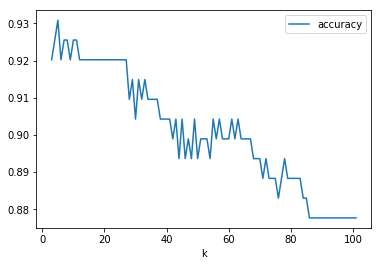

In [59]:
accuracy_df.plot(kind='line', x='k', y='accuracy')

In [63]:
accuracy_df.sort_values('accuracy', ascending=False)

,k,accuracy
2,5,0.930851
1,4,0.925532
4,7,0.925532
5,8,0.925532
7,10,0.925532
8,11,0.925532
0,3,0.920213
16,19,0.920213
24,27,0.920213
23,26,0.920213
